##### <img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Predictive analytics</center>


# Challenge S5: Modelos regresivos - Iteración y mejoras

## Objetivo

El objetivo de este challenge es usar nuestro dataframe de ventas en retail y hacer un modelo para la predicción de ventas para un artículo distinto del que vimos en el worksheet.

Tendréis que explorar los datos para ver el comportamiento del artículo elegido y las peculiaridades que pueda tener.

Luego tendréis que hacer un modelo que pueda predecir las ventas de este artículo usando todo lo aprendido anteriormente, probando distintos modelos, hiperparametrizándolos y por último añadiendo todas las variables sintéticas que veáis convenientes para que el modelo aprenda mejor del comportamiento de las unidades vendidas del producto.

## 1. Configuración del entorno

Cargamos los paquetes que vamos a utilizar en la sesión.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## 2. Carga de los datos, filtrado de nuestro artículo y visualización de los datos
 



**Carga el dataframe**

In [2]:
dataRetail = pd.read_csv('Dataframe_Retail.csv', delimiter=',')
dataRetail['Referencia'].value_counts()

Baguetes 2 unidades                        862
Cerveza tercio                             862
Bolsa naranjas 2Kg.                        860
Tomate jugoso al peso                      859
Pack de plátanos                           858
Naranja en cajas                           858
Melo  OR                                   847
Jamón reserva                              829
Fresa premium 500gr                        812
Aceite de oliva virgen extra 5 l           797
Mandarina                                  650
MERLUZA PALANGRE 1 - 2 Kg (1 Caja 10Q.)    624
Sepia                                      617
Filetes de salmón                          615
Name: Referencia, dtype: int64

**Usa una máscara para filtrar el artículo sobre el que queremos realizar las predicciones**

In [3]:
dataMandarinas = dataRetail[dataRetail['Referencia']=='Mandarina']
dataMandarinas = dataMandarinas.reset_index()
dataMandarinas.head()

index       Fecha Referencia     Unidades       Ventas
0      4  2017-01-02  Mandarina  1752.468997  3356.279999
1     21  2017-01-03  Mandarina  2142.780998  4261.969998
2     30  2017-01-04  Mandarina  2336.892000  4649.549999
3     42  2017-01-05  Mandarina  3417.391000  6799.899995
4     53  2017-01-06  Mandarina     1.920000     3.820000

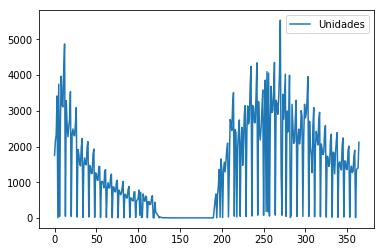

In [4]:
dataMandarinas[['Fecha','Unidades']][:365].plot()

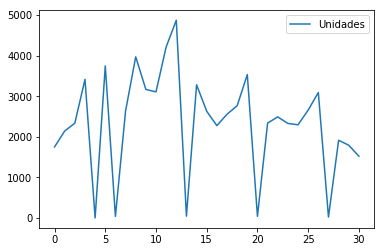

In [5]:
dataMandarinas[['Fecha','Unidades']][:31].plot()

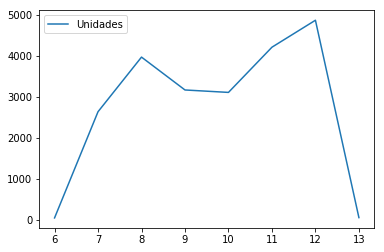

In [6]:
dataMandarinas[['Fecha','Unidades']][6:14].plot()

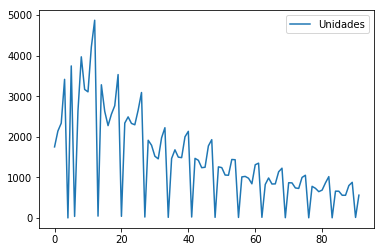

In [7]:
dataMandarinas[['Fecha','Unidades']][:92].plot()

## 3. Prueba de la predicción sobre nuestras unidades vendidas con distintos modelos

** Con la función de evaluación puedes probar el funcionamiento de distintos modelos**

In [8]:
dataMandarinas['Fecha Format'] = pd.to_datetime(dataMandarinas['Fecha'], format='%Y-%m-%d')
dataMandarinas['OffsetDays'] = dataMandarinas['Fecha Format'] - dataMandarinas['Fecha Format'].iloc[0]
dataMandarinas['OffsetDays'] = dataMandarinas['OffsetDays'].dt.days

In [9]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [10]:
def calculoEvaluacionModelo(modelo,df,norm):

    xPredicted = []
    yPredicted = []
    ySpotted = []
    mean_error = []

    for day in range(800,860):
        train = df[df['OffsetDays'] < day]
        val = df[df['OffsetDays'] == day]       
        
        xtr, xts = train.drop(['Unidades'], axis=1), val.drop(['Unidades'], axis=1)
        
        if(norm==True):
            sc = StandardScaler()  
            xtr = sc.fit_transform(xtr)  
            xts = sc.transform(xts)  
        ytr, yts = train['Unidades'].values, val['Unidades'].values  

        mdl = modelo
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)

        xPredicted=xPredicted + [day]
        yPredicted=yPredicted + [p[0]]
        ySpotted = ySpotted + [yts[0]]

        error = rmsle(yts, p)
        print('Month %d - Error %.5f' % (day, error))
        mean_error.append(error)

    print('Mean Error = %.5f' % np.mean(mean_error))
    prediction = pd.DataFrame(
        {'Sold units predicted': yPredicted,
         'Sold units actually spotted': ySpotted
        },index=xPredicted)
    prediction.plot()

** Elige el modelo que más te haya gustado o mejor haya funcionado e hiperparametrizalo si quieres**

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 800 - Error 0.64638


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 801 - Error 0.65502


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 802 - Error 0.28456


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 803 - Error 0.29045


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 804 - Error 4.93186


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 805 - Error 0.59193


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 806 - Error 0.63718


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 807 - Error 0.70608


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 808 - Error 0.68386


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 809 - Error 0.33500


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 810 - Error 0.31489


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 811 - Error 4.71859


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 812 - Error 0.53486


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 813 - Error 0.55433


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 814 - Error 0.67106


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 815 - Error 0.64591


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 816 - Error 0.35207


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 817 - Error 0.38903
Month 818 - Error 5.09694
Month 819 - Error 0.64639
Month 820 - Error 0.44659
Month 821 - Error 0.71566
Month 822 - Error 0.67357
Month 823 - Error 0.35742
Month 824 - Error 0.30218
Month 825 - Error 4.86624
Month 826 - Error 0.64905
Month 827 - Error 0.57681
Month 828 - Error 0.68387
Month 829 - Error 0.71717
Month 830 - Error 0.39348
Month 831 - Error 0.36325
Month 832 - Error 5.09968
Month 833 - Error 0.68183
Month 834 - Error 0.62619
Month 835 - Error 0.54130
Month 836 - Error 0.19531
Month 837 - Error 3.49450
Month 838 - Error 0.25474
Month 839 - Error 4.05440
Month 840 - Error 4.40460


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 841 - Error 0.42299
Month 842 - Error 0.59058
Month 843 - Error 0.70738


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 844 - Error 0.52630
Month 845 - Error 0.48643
Month 846 - Error 5.12270
Month 847 - Error 0.75110
Month 848 - Error 0.28671
Month 849 - Error 4.91423
Month 850 - Error 0.43088
Month 851 - Error 0.29271
Month 852 - Error 0.27961
Month 853 - Error 4.96142


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 854 - Error 0.67853


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 855 - Error 0.67621


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 856 - Error 0.87706
Month 857 - Error 0.79681


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 858 - Error 0.39140


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 859 - Error 1.03418
Mean Error = 1.30019
Month 800 - Error 0.48970
Month 801 - Error 0.50375
Month 802 - Error 0.13439
Month 803 - Error 0.13835
Month 804 - Error 4.78326
Month 805 - Error 0.43229
Month 806 - Error 0.48423
Month 807 - Error 0.53705
Month 808 - Error 0.54462
Month 809 - Error 0.23478
Month 810 - Error 0.15665
Month 811 - Error 4.55503
Month 812 - Error 0.36784
Month 813 - Error 0.42007
Month 814 - Error 0.50264
Month 815 - Error 0.50560
Month 816 - Error 0.18034
Month 817 - Error 0.22352
Month 818 - Error 5.10391
Month 819 - Error 0.55553
Month 820 - Error 0.48147
Month 821 - Error 0.68574
Month 822 - Error 0.64319
Month 823 - Error 0.37228
Month 824 - Error 0.29647
Month 825 - Error 4.84805
Month 826 - Error 0.62614
Month 827 - Error 0.62797
Month 828 - Error 0.69851
Month 829 - Error 0.72330
Month 830 - Error 0.42060
Month 831 - Error 0.36141
Month 832 - Error 5.07608
Month 833 - Error 0.63524
Month 834 - Error 0.60832
Month 835 - Error 0.57562
Month 836 - Error

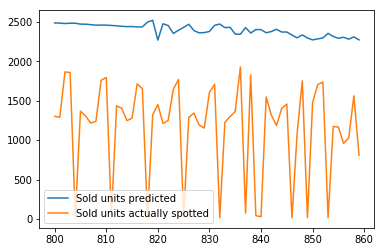

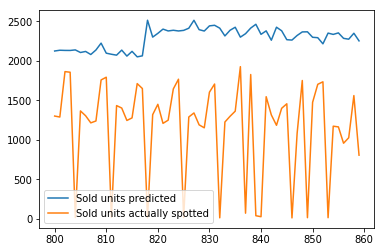

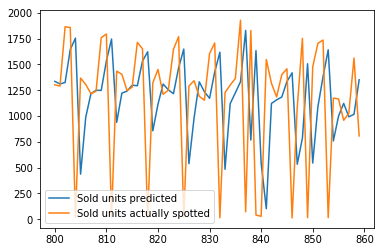

In [11]:
norma=False
dataMandarinas_simple = dataMandarinas[['OffsetDays','Unidades']].copy()
dataMandarinas_simple.head()
calculoEvaluacionModelo(MLPRegressor(),dataMandarinas_simple,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataMandarinas_simple,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=25, random_state=0),dataMandarinas_simple,norma)

Month 800 - Error 0.21146
Month 801 - Error 0.12888
Month 802 - Error 0.45841
Month 803 - Error 0.27782
Month 804 - Error 4.48796
Month 805 - Error 0.22154
Month 806 - Error 0.23444
Month 807 - Error 0.17337
Month 808 - Error 0.15645
Month 809 - Error 0.43582
Month 810 - Error 0.32202
Month 811 - Error 4.28552
Month 812 - Error 0.14276
Month 813 - Error 0.13121
Month 814 - Error 0.04206
Month 815 - Error 0.05488
Month 816 - Error 0.32845
Month 817 - Error 0.17296
Month 818 - Error 4.59317
Month 819 - Error 0.11695
Month 820 - Error 0.26796
Month 821 - Error 0.02336
Month 822 - Error 0.06328
Month 823 - Error 0.33072
Month 824 - Error 0.31055
Month 825 - Error 4.40038
Month 826 - Error 0.17543
Month 827 - Error 0.27525
Month 828 - Error 0.10551
Month 829 - Error 0.02035
Month 830 - Error 0.31649
Month 831 - Error 0.26592
Month 832 - Error 4.58144
Month 833 - Error 0.14649
Month 834 - Error 0.38624
Month 835 - Error 0.36477
Month 836 - Error 0.57847
Month 837 - Error 2.97934
Month 838 - 

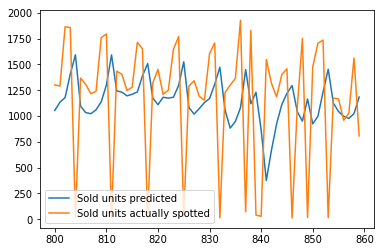

In [14]:
#Hiperparametrización
forestVC = RandomForestRegressor(random_state = 0,
                                  n_estimators = 25,
                                  max_depth = 20, 
                                  min_samples_split = 2,  
                                  min_samples_leaf = 2) 

calculoEvaluacionModelo(forestVC, dataMandarinas_simple,norma)

## 4. Complementar el dataframe con variables sintéticas

** En base a lo que hayas observado en el comportamiento de las unidades vendidas de tu referencia crea variables sintéticas que creas que ayuden al modelo a mejorar la predicción**

In [16]:
dataMandarinas_lag = dataMandarinas[['OffsetDays','Unidades']].copy()

dataMandarinas_lag['Unidades_prev1'] = dataMandarinas_lag['Unidades'].shift(1)
dataMandarinas_lag['Unidades_prev2'] = dataMandarinas_lag['Unidades'].shift(2)
dataMandarinas_lag['Unidades_prev3'] = dataMandarinas_lag['Unidades'].shift(3)
dataMandarinas_lag['Unidades_prev4'] = dataMandarinas_lag['Unidades'].shift(4)
dataMandarinas_lag['Unidades_prev5'] = dataMandarinas_lag['Unidades'].shift(5)
dataMandarinas_lag['Unidades_prev6'] = dataMandarinas_lag['Unidades'].shift(6)
dataMandarinas_lag['Unidades_prev7'] = dataMandarinas_lag['Unidades'].shift(7)

dataMandarinas_lag=dataMandarinas_lag.dropna()

In [17]:
dataMandarinas_lag.head()

OffsetDays     Unidades  Unidades_prev1  Unidades_prev2  Unidades_prev3  \
7            7  2636.501000       38.965000     3748.150002        1.920000   
8            8  3972.469999     2636.501000       38.965000     3748.150002   
9            9  3168.526002     3972.469999     2636.501000       38.965000   
10          10  3109.082001     3168.526002     3972.469999     2636.501000   
11          11  4214.677000     3109.082001     3168.526002     3972.469999   

    Unidades_prev4  Unidades_prev5  Unidades_prev6  Unidades_prev7  
7      3417.391000     2336.892000     2142.780998     1752.468997  
8         1.920000     3417.391000     2336.892000     2142.780998  
9      3748.150002        1.920000     3417.391000     2336.892000  
10       38.965000     3748.150002        1.920000     3417.391000  
11     2636.501000       38.965000     3748.150002        1.920000

Month 800 - Error 0.06459
Month 801 - Error 0.08903
Month 802 - Error 0.14265
Month 803 - Error 0.00579
Month 804 - Error 1.26252
Month 805 - Error 0.03468
Month 806 - Error 0.08868
Month 807 - Error 0.01589
Month 808 - Error 0.09572
Month 809 - Error 0.08961
Month 810 - Error 0.09924
Month 811 - Error 0.83857
Month 812 - Error 0.08868
Month 813 - Error 0.04738
Month 814 - Error 0.04299
Month 815 - Error 0.08724
Month 816 - Error 0.02325
Month 817 - Error 0.04165
Month 818 - Error 1.69030
Month 819 - Error 0.00195
Month 820 - Error 0.06889
Month 821 - Error 0.09219
Month 822 - Error 0.10688
Month 823 - Error 0.12920
Month 824 - Error 0.08611
Month 825 - Error 1.28683
Month 826 - Error 0.07316
Month 827 - Error 0.02576
Month 828 - Error 0.07316
Month 829 - Error 0.05754
Month 830 - Error 0.12290
Month 831 - Error 0.03221
Month 832 - Error 0.17933
Month 833 - Error 0.11028
Month 834 - Error 0.00205
Month 835 - Error 0.06650
Month 836 - Error 0.31659
Month 837 - Error 3.06011
Month 838 - 

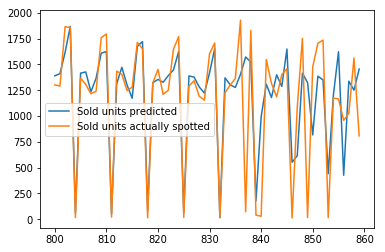

In [18]:
calculoEvaluacionModelo(forestVC, dataMandarinas_lag,norma)

Elegiremos el modelo hiperparametrizado ya que, aunque gráficamente no se aproxime tanto como sin hiperparametrizar, hemos conseguido rebajar el error medio al 45% aproximadamente.

### Activación por días de la semana, ya que se ha observado estacionalidad semanal

In [20]:
dataMandarinas['Día de la semana'] = dataMandarinas['Fecha Format'].dt.dayofweek

In [21]:
dataMandarinas['Lunes'] =  dataMandarinas['Día de la semana'].apply(lambda x: 1 if (x==0) else 0) 
dataMandarinas['Martes'] =  dataMandarinas['Día de la semana'].apply(lambda x: 1 if (x==1) else 0) 
dataMandarinas['Miércoles'] =  dataMandarinas['Día de la semana'].apply(lambda x: 1 if (x==2) else 0) 
dataMandarinas['Jueves'] =  dataMandarinas['Día de la semana'].apply(lambda x: 1 if (x==3) else 0) 
dataMandarinas['Viernes'] =  dataMandarinas['Día de la semana'].apply(lambda x: 1 if (x==4) else 0) 
dataMandarinas['Sábado'] =  dataMandarinas['Día de la semana'].apply(lambda x: 1 if (x==5) else 0) 
dataMandarinas['Domingo'] =  dataMandarinas['Día de la semana'].apply(lambda x: 1 if (x==6) else 0) 

In [22]:
dataMandarinas

index       Fecha Referencia     Unidades       Ventas Fecha Format  \
0        4  2017-01-02  Mandarina  1752.468997  3356.279999   2017-01-02   
1       21  2017-01-03  Mandarina  2142.780998  4261.969998   2017-01-03   
2       30  2017-01-04  Mandarina  2336.892000  4649.549999   2017-01-04   
3       42  2017-01-05  Mandarina  3417.391000  6799.899995   2017-01-05   
4       53  2017-01-06  Mandarina     1.920000     3.820000   2017-01-06   
5       61  2017-01-07  Mandarina  3748.150002  7458.090009   2017-01-07   
6       70  2017-01-08  Mandarina    38.965000    77.520000   2017-01-08   
7       87  2017-01-09  Mandarina  2636.501000  5245.839998   2017-01-09   
8       94  2017-01-10  Mandarina  3972.469999  6734.669998   2017-01-10   
9      102  2017-01-11  Mandarina  3168.526002  5355.299998   2017-01-11   
10     118  2017-01-12  Mandarina  3109.082001  5254.190004   2017-01-12   
11     138  2017-01-13  Mandarina  4214.677000  7122.930000   2017-01-13   
12     145  2017-01-14  Mandarina  4874.138995  8237.490000   2017-01-14   
13     160  2017-01-15  Mandarina    46.385000    78.390000   2017-01-15   
14     176  2017-01-16  Mandarina  3283.583999  5549.309995   2017-01-16   
15     180  2017-01-17  Mandarina  2629.592000  5209.180000   2017-01-17   
16     197  2017-01-18  Mandarina  2276.705001  4529.960000   2017-01-18   
17     216  2017-01-19  Mandarina  2557.683002  5089.420002   2017-01-19   
18     224  2017-01-20  Mandarina  2767.466000  5506.599998   2017-01-20   
19     235  2017-01-21  Mandarina  3534.848000  7033.470002   2017-01-21   
20     256  2017-01-22  Mandarina    41.185000    81.940000   2017-01-22   
21     261  2017-01-23  Mandarina  2339.369999  4654.309999   2017-01-23   
22     276  2017-01-24  Mandarina  2491.831997  4957.879999   2017-01-24   
23     283  2017-01-25  Mandarina  2330.721000  4637.600001   2017-01-25   
24     309  2017-01-26  Mandarina  2297.555998  4571.399996   2017-01-26   
25     311  2017-01-27  Mandarina  2659.515002  7185.929992   2017-01-27   
26     324  2017-01-28  Mandarina  3093.053996  8364.450004   2017-01-28   
27     346  2017-01-29  Mandarina    23.430000    64.360000   2017-01-29   
28     357  2017-01-30  Mandarina  1916.085999  5193.339998   2017-01-30   
29     368  2017-01-31  Mandarina  1793.101997  4864.379999   2017-01-31   
..     ...         ...        ...          ...          ...          ...   
620  10567  2019-04-19  Mandarina    72.765000   217.580000   2019-04-19   
621  10589  2019-04-20  Mandarina  1828.586001  5467.529997   2019-04-20   
622  10603  2019-04-21  Mandarina    40.705000   121.740000   2019-04-21   
623  10609  2019-04-22  Mandarina    28.370000    84.820000   2019-04-22   
624  10627  2019-04-23  Mandarina  1547.679000  4627.790002   2019-04-23   
625  10634  2019-04-24  Mandarina  1316.882000  3937.410006   2019-04-24   
626  10654  2019-04-25  Mandarina  1185.747000  3545.380001   2019-04-25   
627  10661  2019-04-26  Mandarina  1400.968999  4188.839997   2019-04-26   
628  10680  2019-04-27  Mandarina  1457.871000  4359.160000   2019-04-27   
629  10688  2019-04-28  Mandarina    12.910000    38.600000   2019-04-28   
630  10702  2019-04-29  Mandarina  1083.975999  3241.179999   2019-04-29   
631  10713  2019-04-30  Mandarina  1752.909998  2522.879999   2019-04-30   
632  10726  2019-05-01  Mandarina    15.870000    23.040000   2019-05-01   
633  10733  2019-05-02  Mandarina  1476.480000  2082.040000   2019-05-02   
634  10748  2019-05-03  Mandarina  1704.712999  2398.449997   2019-05-03   
635  10765  2019-05-04  Mandarina  1736.308999  2448.009996   2019-05-04   
636  10777  2019-05-05  Mandarina    15.500000    22.480000   2019-05-05   
637  10783  2019-05-06  Mandarina  1174.331998  1652.069997   2019-05-06   
638  10803  2019-05-07  Mandarina  1165.411000  1640.889998   2019-05-07   
639  10814  2019-05-08  Mandarina   958.592998  1348.979999   2019-05-08   
640  10821  2019-05-09  Mandarina  1027.782000  1446.

In [23]:
dataMandarinas_lag_days = dataMandarinas[['OffsetDays','Unidades','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']].copy()

dataMandarinas_lag_days['Unidades_prev1'] = dataMandarinas_lag_days['Unidades'].shift(1)
dataMandarinas_lag_days['Unidades_prev2'] = dataMandarinas_lag_days['Unidades'].shift(2)
dataMandarinas_lag_days['Unidades_prev3'] = dataMandarinas_lag_days['Unidades'].shift(3)
dataMandarinas_lag_days['Unidades_prev4'] = dataMandarinas_lag_days['Unidades'].shift(4)
dataMandarinas_lag_days['Unidades_prev5'] = dataMandarinas_lag_days['Unidades'].shift(5)
dataMandarinas_lag_days['Unidades_prev6'] = dataMandarinas_lag_days['Unidades'].shift(6)
dataMandarinas_lag_days['Unidades_prev7'] = dataMandarinas_lag_days['Unidades'].shift(7)

dataMandarinas_lag_days=dataMandarinas_lag_days.dropna()
dataMandarinas_lag_days.head()

OffsetDays     Unidades  Lunes  Martes  Miércoles  Jueves  Viernes  \
7            7  2636.501000      1       0          0       0        0   
8            8  3972.469999      0       1          0       0        0   
9            9  3168.526002      0       0          1       0        0   
10          10  3109.082001      0       0          0       1        0   
11          11  4214.677000      0       0          0       0        1   

    Sábado  Domingo  Unidades_prev1  Unidades_prev2  Unidades_prev3  \
7        0        0       38.965000     3748.150002        1.920000   
8        0        0     2636.501000       38.965000     3748.150002   
9        0        0     3972.469999     2636.501000       38.965000   
10       0        0     3168.526002     3972.469999     2636.501000   
11       0        0     3109.082001     3168.526002     3972.469999   

    Unidades_prev4  Unidades_prev5  Unidades_prev6  Unidades_prev7  
7      3417.391000     2336.892000     2142.780998     1752.468997  
8         1.920000     3417.391000     2336.892000     2142.780998  
9      3748.150002        1.920000     3417.391000     2336.892000  
10       38.965000     3748.150002        1.920000     3417.391000  
11     2636.501000       38.965000     3748.150002        1.920000

Month 800 - Error 0.03714
Month 801 - Error 0.07663
Month 802 - Error 0.15738
Month 803 - Error 0.02376
Month 804 - Error 0.23946
Month 805 - Error 0.04496
Month 806 - Error 0.10018
Month 807 - Error 0.01971
Month 808 - Error 0.08299
Month 809 - Error 0.07719
Month 810 - Error 0.05710
Month 811 - Error 0.00540
Month 812 - Error 0.09811
Month 813 - Error 0.05182
Month 814 - Error 0.05280
Month 815 - Error 0.07407
Month 816 - Error 0.02042
Month 817 - Error 0.04281
Month 818 - Error 0.29468
Month 819 - Error 0.00475
Month 820 - Error 0.06773
Month 821 - Error 0.08840
Month 822 - Error 0.09180
Month 823 - Error 0.13213
Month 824 - Error 0.07483
Month 825 - Error 0.18643
Month 826 - Error 0.06340
Month 827 - Error 0.02665
Month 828 - Error 0.07028
Month 829 - Error 0.03918
Month 830 - Error 0.12404
Month 831 - Error 0.02961
Month 832 - Error 0.31969
Month 833 - Error 0.12109
Month 834 - Error 0.00160
Month 835 - Error 0.08731
Month 836 - Error 0.31667
Month 837 - Error 3.05189
Month 838 - 

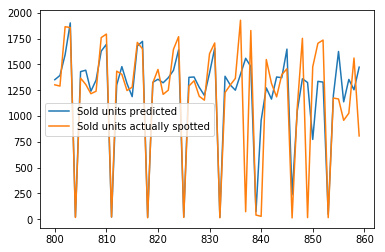

In [25]:
calculoEvaluacionModelo(forestVC, dataMandarinas_lag_days,norma)

Como se puede observar, al añadir la activación por días se obtiene un error mucho más bajo y la curva tiene una mejor aproximación. Sin embargo, se podría mejorar incluyendo activación por meses, ya que se ha observado al principio que hay algunos en los que las ventas caen bastante.

### Activación por meses, ya que hay algunos meses en los que no se realizan ventas

In [26]:
dataMandarinas['Mes'] = dataMandarinas['Fecha Format'].dt.month
dataMandarinas['Enero'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==1) else 0) 
dataMandarinas['Febrero'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==2) else 0) 
dataMandarinas['Marzo'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==3) else 0) 
dataMandarinas['Abril'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==4) else 0) 
dataMandarinas['Mayo'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==5) else 0) 
dataMandarinas['Junio'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==6) else 0) 
dataMandarinas['Julio'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==7) else 0) 
dataMandarinas['Agosto'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==8) else 0) 
dataMandarinas['Septiembre'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==9) else 0) 
dataMandarinas['Octubre'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==10) else 0) 
dataMandarinas['Noviembre'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==11) else 0) 
dataMandarinas['Diciembre'] =  dataMandarinas['Mes'].apply(lambda x: 1 if (x==12) else 0) 

dataMandarinas_lag_days_month = dataMandarinas[['OffsetDays','Unidades','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']].copy()

dataMandarinas_lag_days_month['Unidades_prev1'] = dataMandarinas_lag_days_month['Unidades'].shift(1)
dataMandarinas_lag_days_month['Unidades_prev2'] = dataMandarinas_lag_days_month['Unidades'].shift(2)
dataMandarinas_lag_days_month['Unidades_prev3'] = dataMandarinas_lag_days_month['Unidades'].shift(3)
dataMandarinas_lag_days_month['Unidades_prev4'] = dataMandarinas_lag_days_month['Unidades'].shift(4)
dataMandarinas_lag_days_month['Unidades_prev5'] = dataMandarinas_lag_days_month['Unidades'].shift(5)
dataMandarinas_lag_days_month['Unidades_prev6'] = dataMandarinas_lag_days_month['Unidades'].shift(6)
dataMandarinas_lag_days_month['Unidades_prev7'] = dataMandarinas_lag_days_month['Unidades'].shift(7)

dataMandarinas_lag_days_month=dataMandarinas_lag_days_month.dropna()
dataMandarinas_lag_days_month.head()

OffsetDays     Unidades  Lunes  Martes  Miércoles  Jueves  Viernes  \
7            7  2636.501000      1       0          0       0        0   
8            8  3972.469999      0       1          0       0        0   
9            9  3168.526002      0       0          1       0        0   
10          10  3109.082001      0       0          0       1        0   
11          11  4214.677000      0       0          0       0        1   

    Sábado  Domingo  Enero       ...        Octubre  Noviembre  Diciembre  \
7        0        0      1       ...              0          0          0   
8        0        0      1       ...              0          0          0   
9        0        0      1       ...              0          0          0   
10       0        0      1       ...              0          0          0   
11       0        0      1       ...              0          0          0   

    Unidades_prev1  Unidades_prev2  Unidades_prev3  Unidades_prev4  \
7        38.965000     3748.150002        1.920000     3417.391000   
8      2636.501000       38.965000     3748.150002        1.920000   
9      3972.469999     2636.501000       38.965000     3748.150002   
10     3168.526002     3972.469999     2636.501000       38.965000   
11     3109.082001     3168.526002     3972.469999     2636.501000   

    Unidades_prev5  Unidades_prev6  Unidades_prev7  
7      2336.892000     2142.780998     1752.468997  
8      3417.391000     2336.892000     2142.780998  
9         1.920000     3417.391000     2336.892000  
10     3748.150002        1.920000     3417.391000  
11       38.965000     3748.150002        1.920000  

[5 rows x 28 columns]

Month 800 - Error 0.03580
Month 801 - Error 0.10376
Month 802 - Error 0.10280
Month 803 - Error 0.03248
Month 804 - Error 0.15155
Month 805 - Error 0.05653
Month 806 - Error 0.07989
Month 807 - Error 0.02913
Month 808 - Error 0.15148
Month 809 - Error 0.03484
Month 810 - Error 0.05862
Month 811 - Error 0.28439
Month 812 - Error 0.17266
Month 813 - Error 0.02580
Month 814 - Error 0.02359
Month 815 - Error 0.05842
Month 816 - Error 0.05092
Month 817 - Error 0.01350
Month 818 - Error 0.55957
Month 819 - Error 0.03720
Month 820 - Error 0.09249
Month 821 - Error 0.09494
Month 822 - Error 0.11561
Month 823 - Error 0.09474
Month 824 - Error 0.17773
Month 825 - Error 0.57160
Month 826 - Error 0.06224
Month 827 - Error 0.03325
Month 828 - Error 0.03858
Month 829 - Error 0.06855
Month 830 - Error 0.08062
Month 831 - Error 0.02448
Month 832 - Error 0.96608
Month 833 - Error 0.12756
Month 834 - Error 0.00892
Month 835 - Error 0.15819
Month 836 - Error 0.31851
Month 837 - Error 2.99181
Month 838 - 

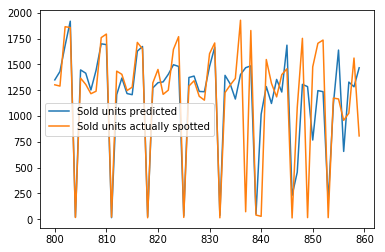

In [29]:
calculoEvaluacionModelo(forestVC, dataMandarinas_lag_days_month,norma)

COmo se puede observar, la gráfica es muy parecida a la obtenida en el caso anterior. Sin embargo, el error ha aumentado ligeramente. Esto puede deberse a la caída de ventas en ciertos intervalos, ya que el modelo no lo está aprendiendo.